In [1]:
import gc

import numpy as np
import pandas as pd
import polars as pl

import matplotlib.pyplot as plt

import folium
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [2]:
polars_df = pl.read_parquet("ml-drought-forecasting/ml-modeling-pipeline/data/03_primary/belt_preprocessed_data.parquet")

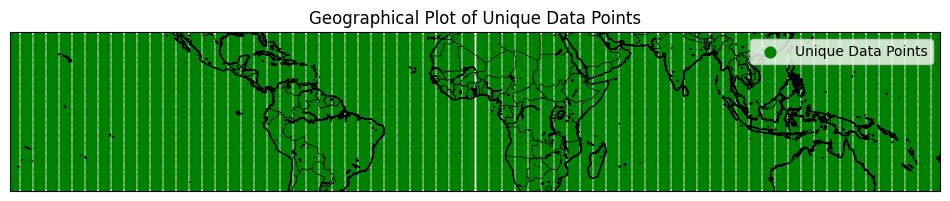

In [3]:
def plot_geographical_data(polars_df: pl.DataFrame):
    """
    Plots unique geographical data points on a map from a Polars DataFrame containing latitude and longitude.

    Parameters:
    - polars_df (pl.DataFrame): A Polars DataFrame with 'lat' and 'lon' columns.

    Author:
    - Adam Przychodni
    """
    # Ensure the DataFrame has the necessary columns
    if not {'lat', 'lon'}.issubset(polars_df.columns):
        raise ValueError("DataFrame must contain 'lat' and 'lon' columns")

    # Select the latitude and longitude columns and get unique pairs
    unique_coords = polars_df.select(['lat', 'lon']).unique()

    # Extract longitude and latitude columns from the unique coordinates
    lons = unique_coords.get_column('lon').to_numpy()
    lats = unique_coords.get_column('lat').to_numpy()

    # Set up the plot with a specified size
    fig, ax = plt.subplots(figsize=(12, 8))

    # Create a Basemap instance with a cylindrical projection
    m = Basemap(projection='cyl', llcrnrlon=lons.min() - 1, llcrnrlat=lats.min() - 1,
                urcrnrlon=lons.max() + 1, urcrnrlat=lats.max() + 1, resolution='i', ax=ax)

    # Draw coastlines and countries for better map visualization
    m.drawcoastlines()
    m.drawcountries()

    # Convert latitude and longitude to map projection coordinates
    x, y = m(lons, lats)

    # Plot the data points with a green color, 'o' marker, and size of 60
    m.scatter(x, y, color='green', label='Unique Data Points', marker='o', s=60)

    # Add a legend and a title to the plot
    plt.legend()
    plt.title('Geographical Plot of Unique Data Points')

    # Display the plot
    plt.show()

    # Close the plot to free up memory
    plt.close(fig)
    
    # Explicitly delete variables and collect garbage
    del m, x, y, lons, lats, unique_coords, fig, ax
    gc.collect()

# Example usage:
plot_geographical_data(polars_df)


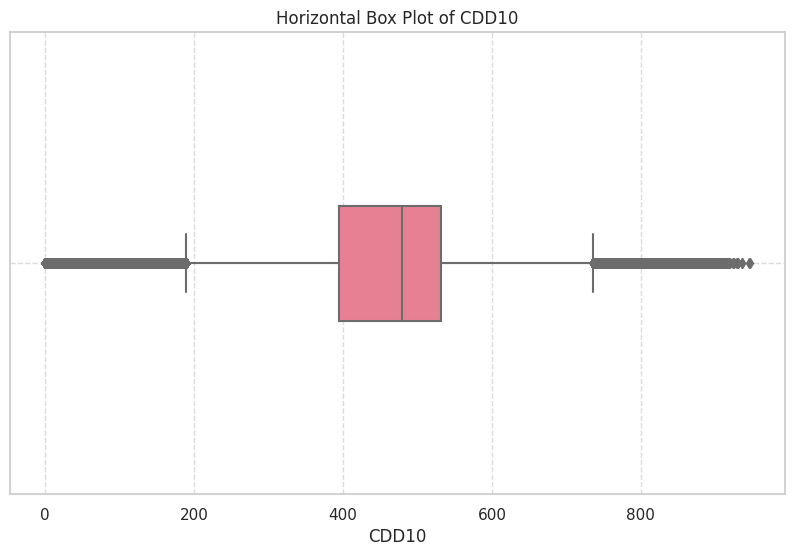

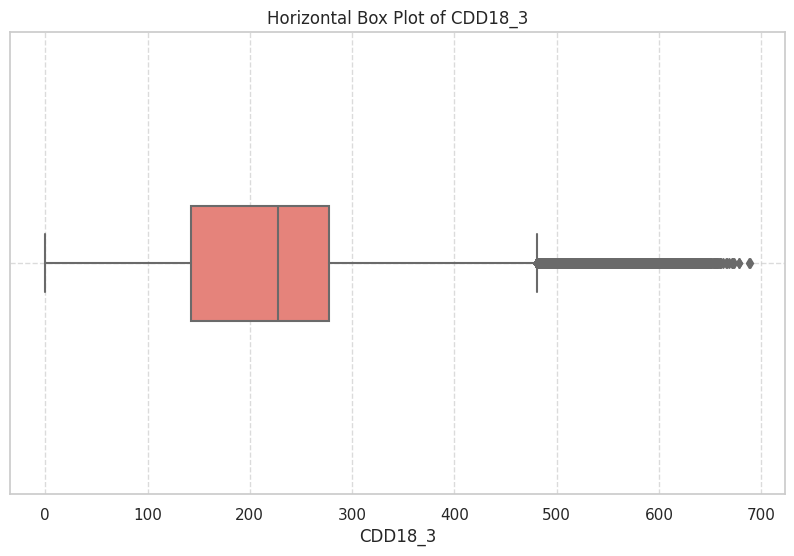

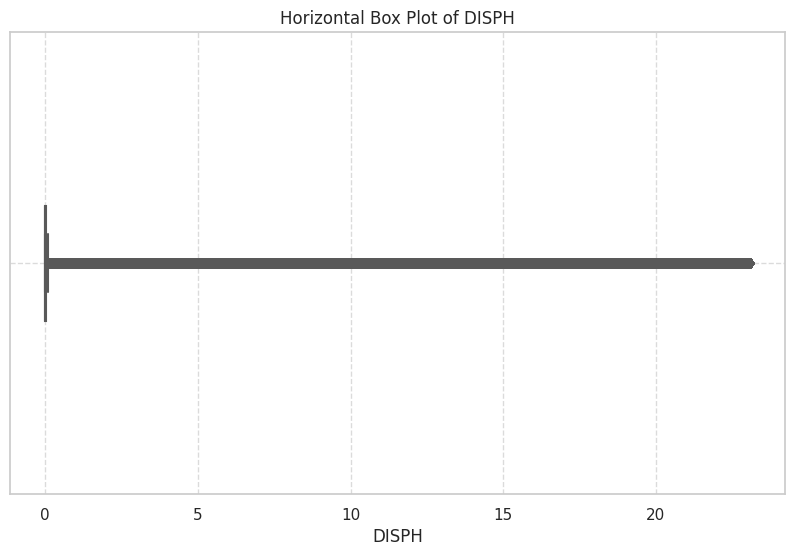

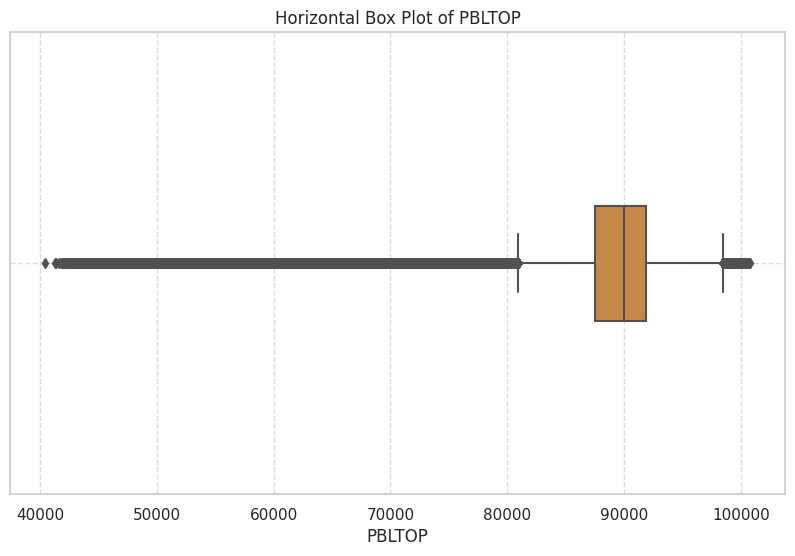

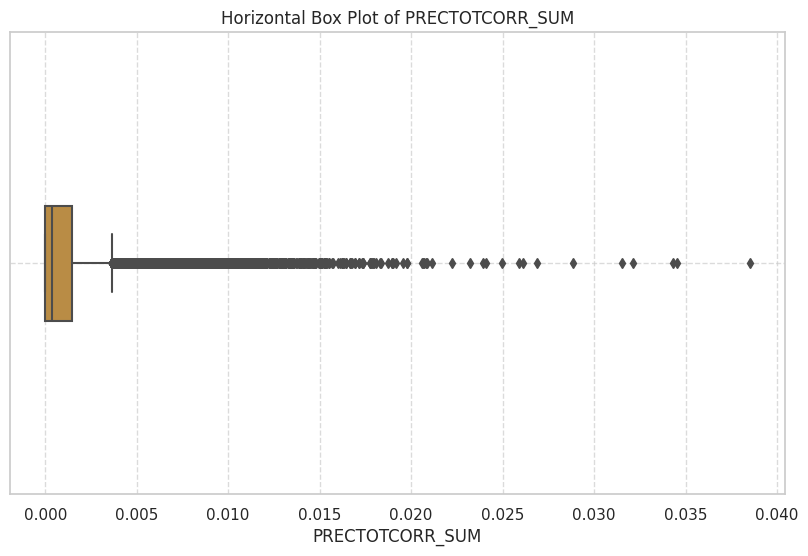

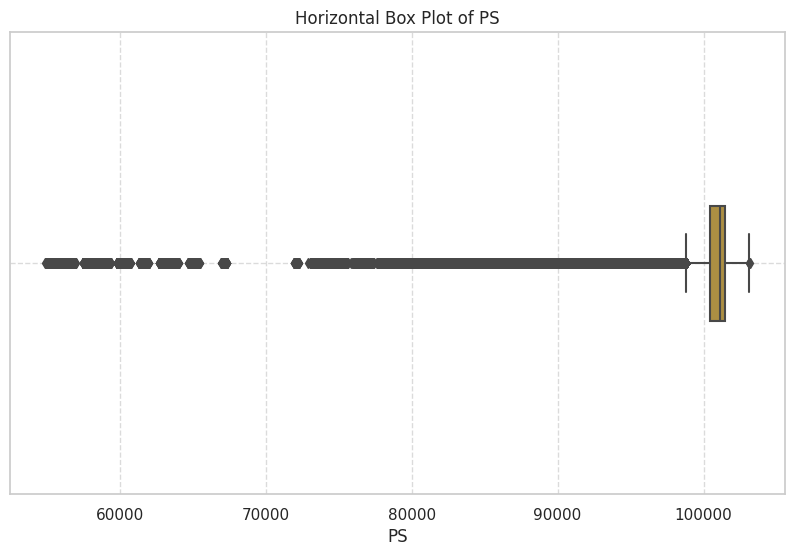

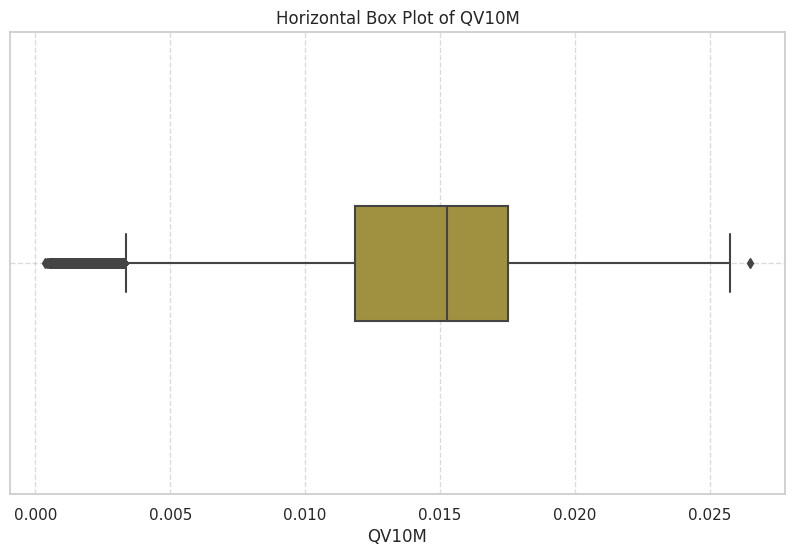

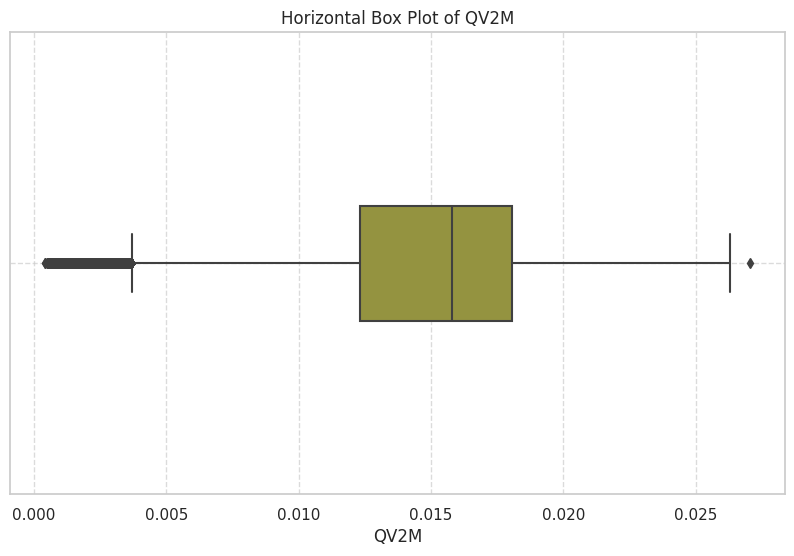

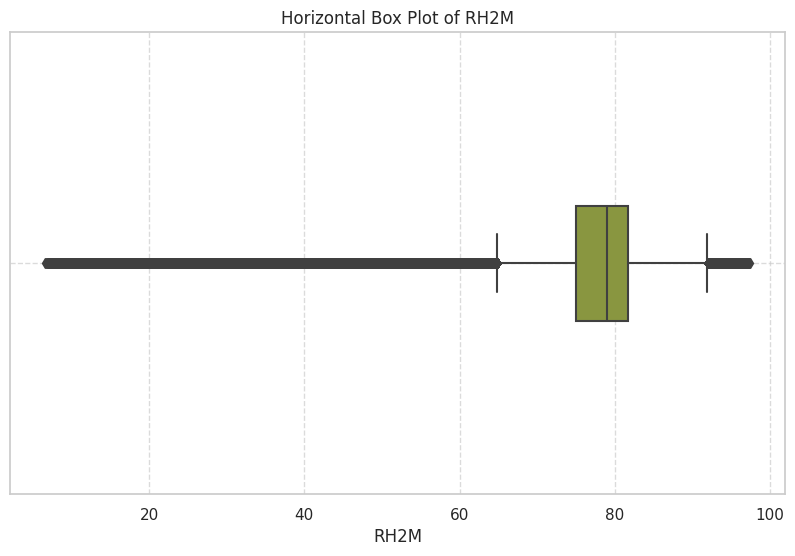

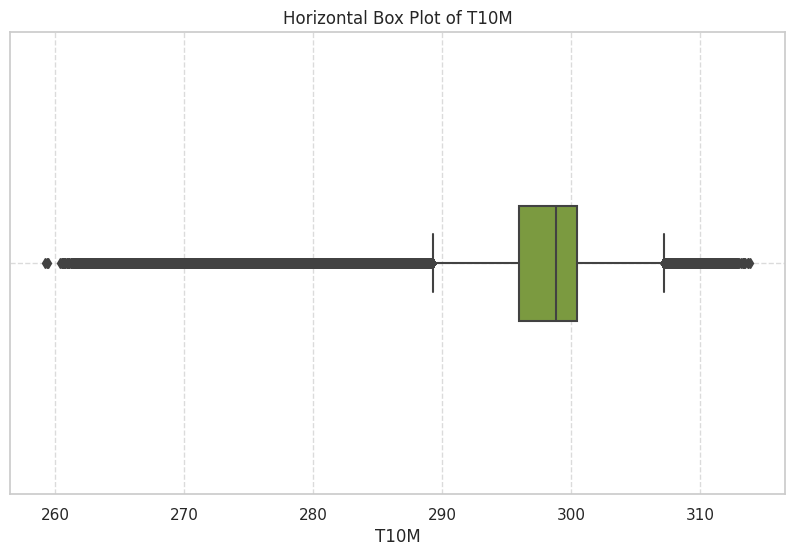

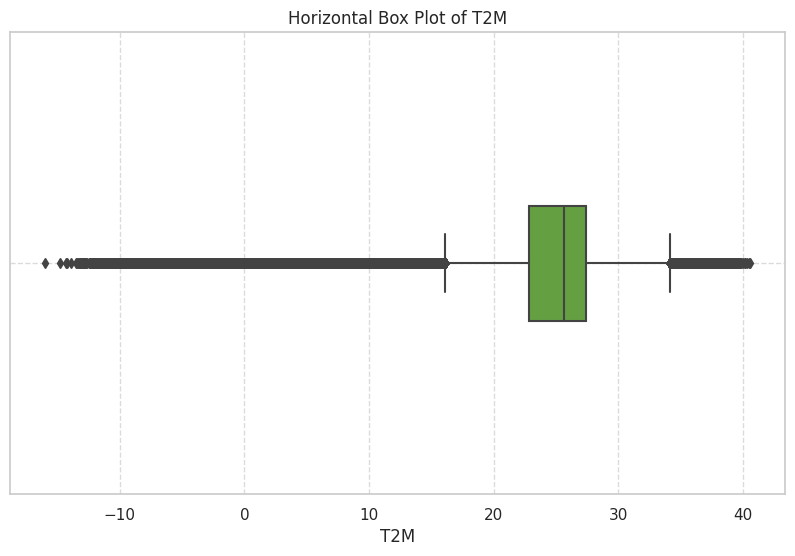

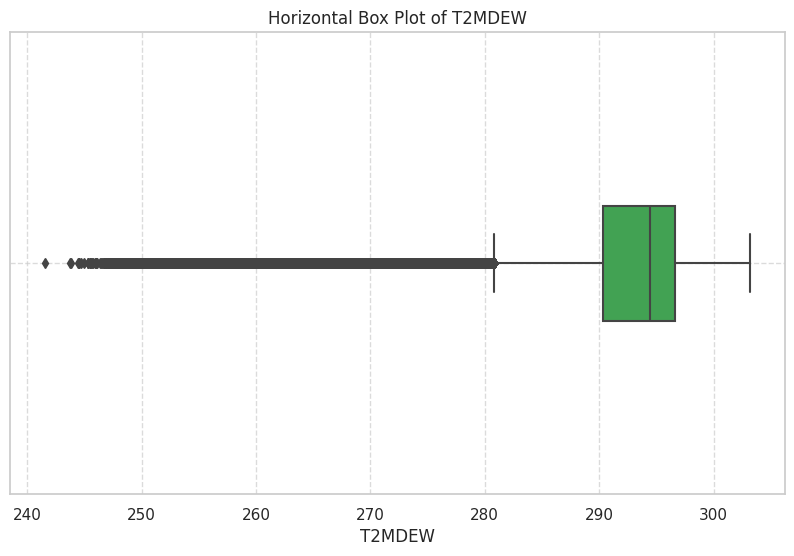

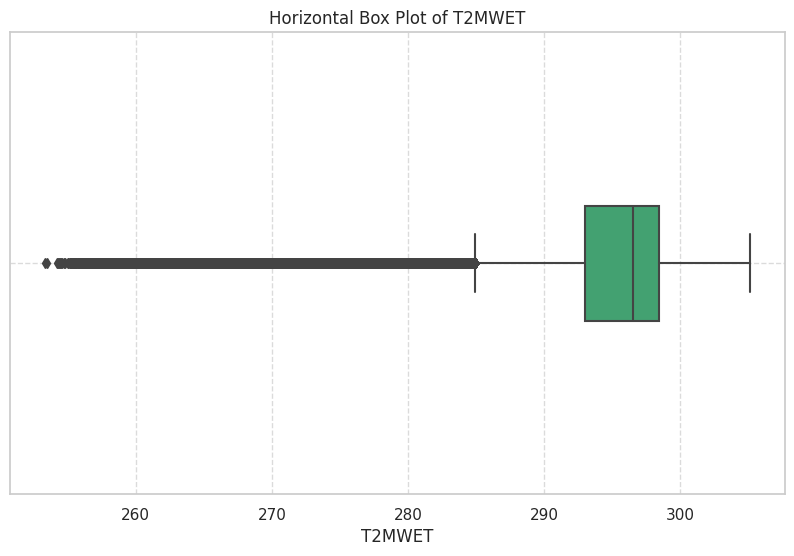

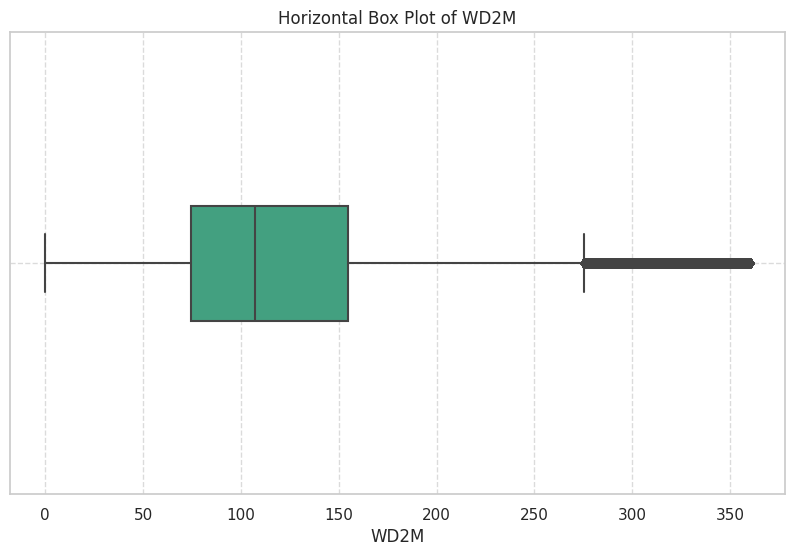

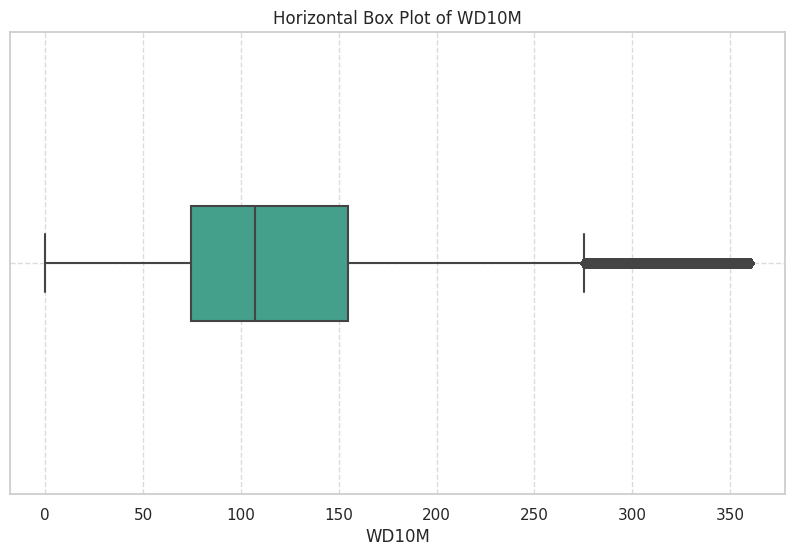

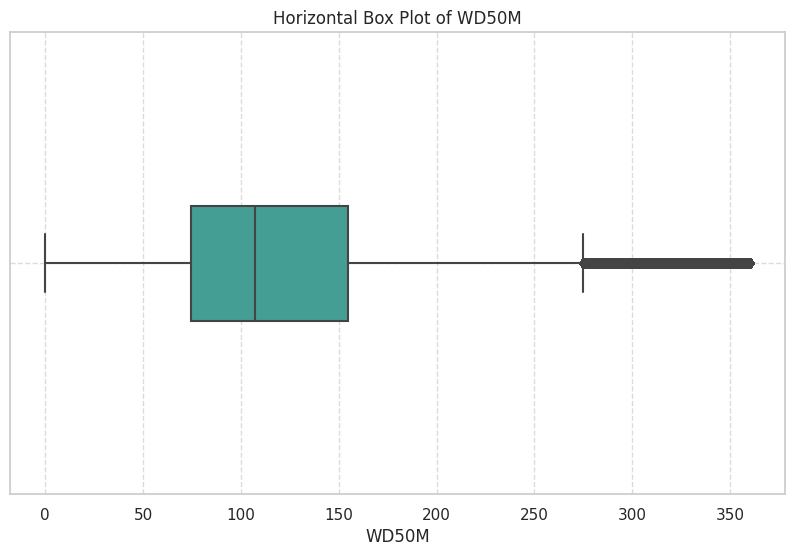

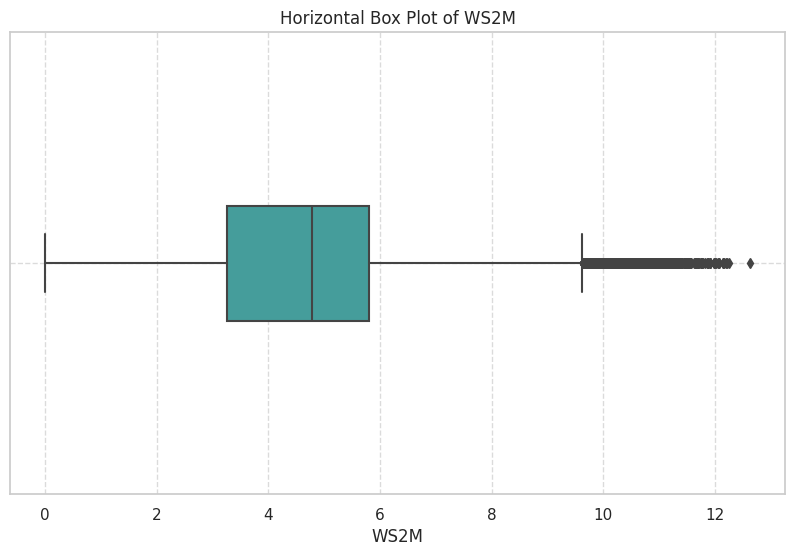

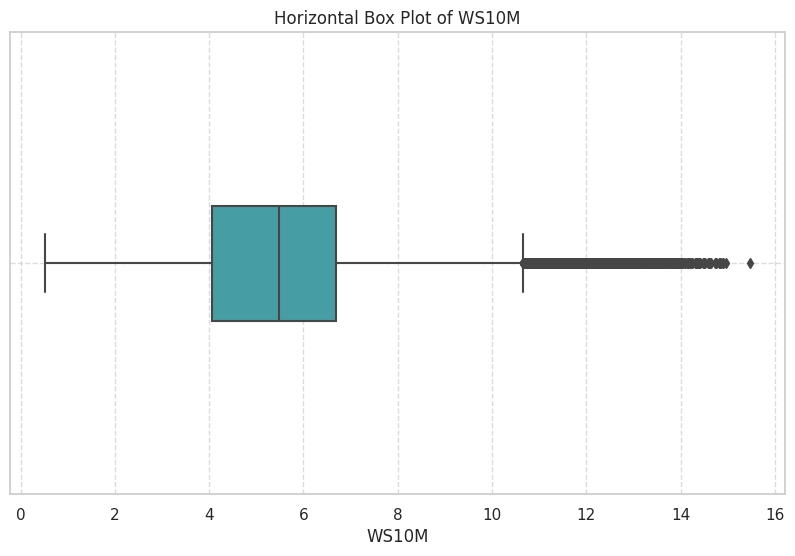

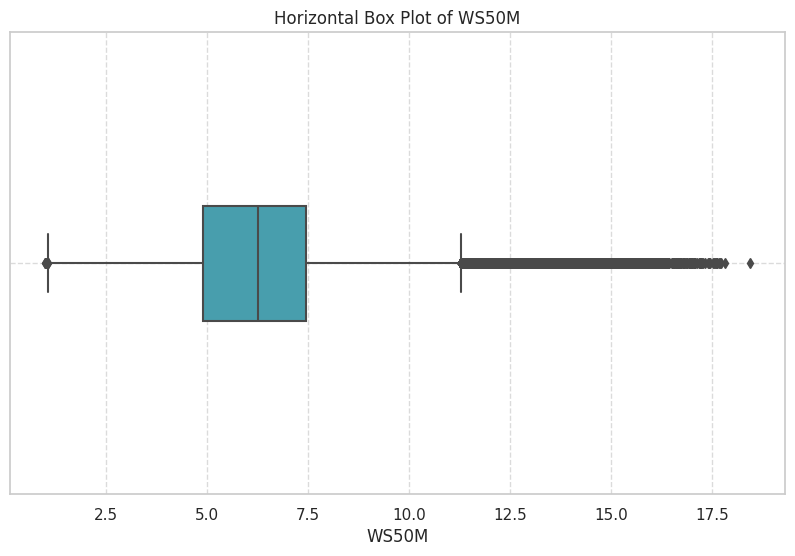

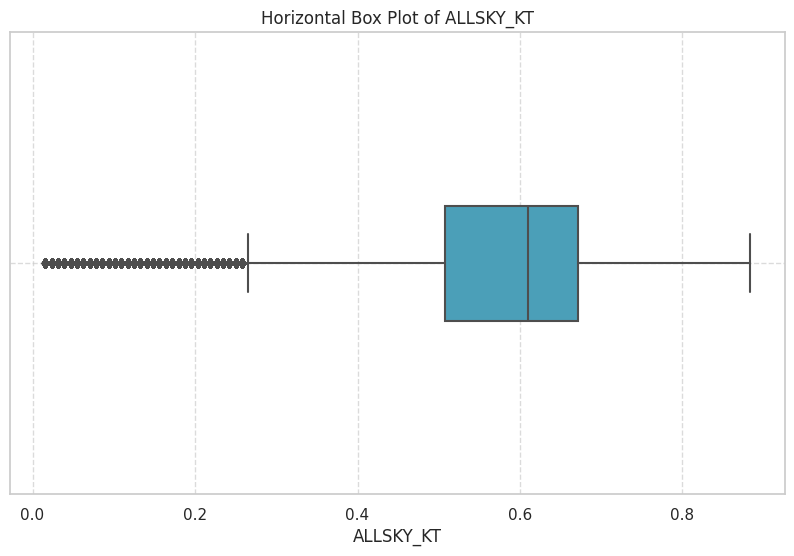

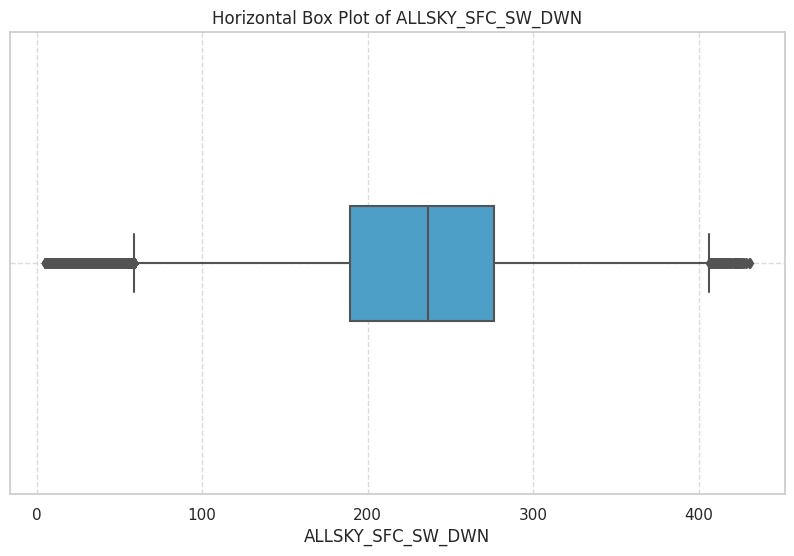

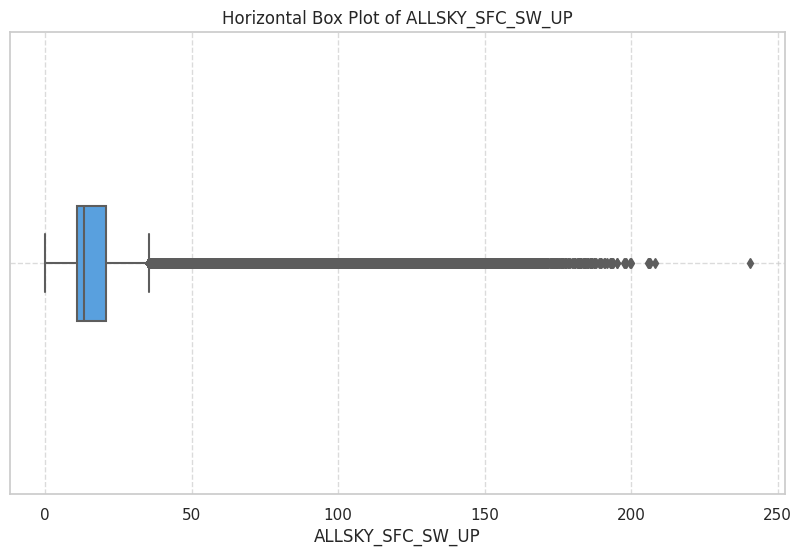

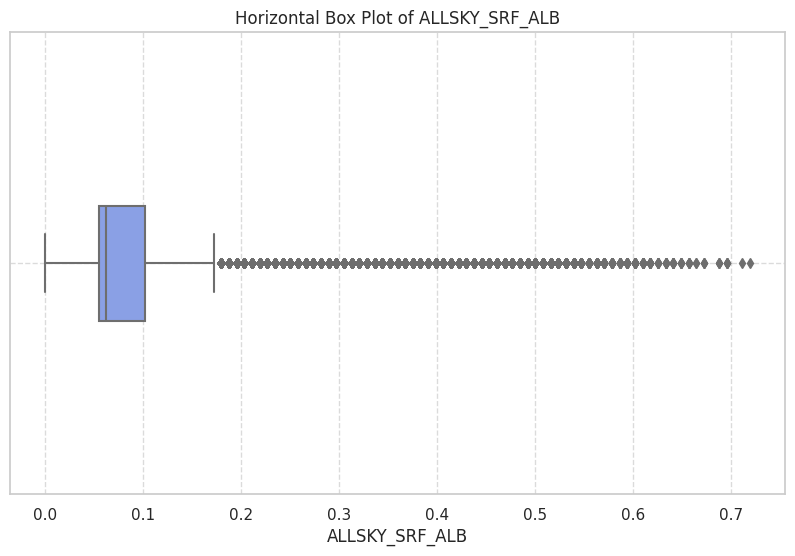

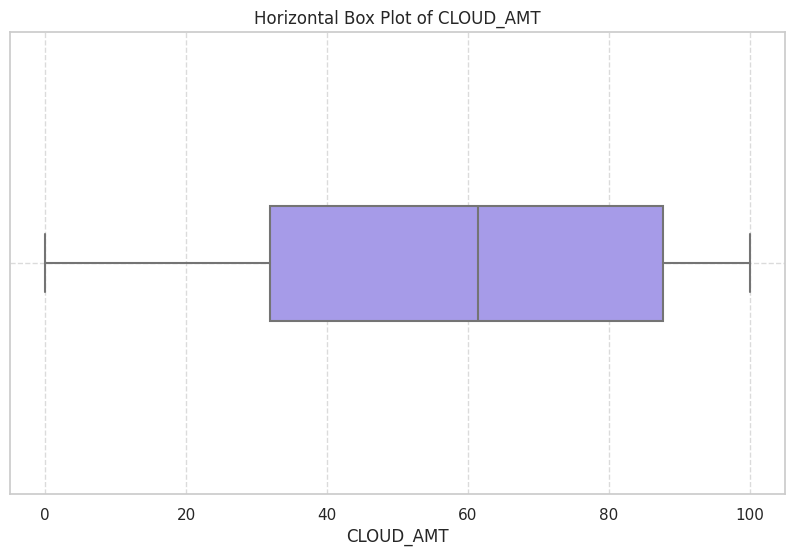

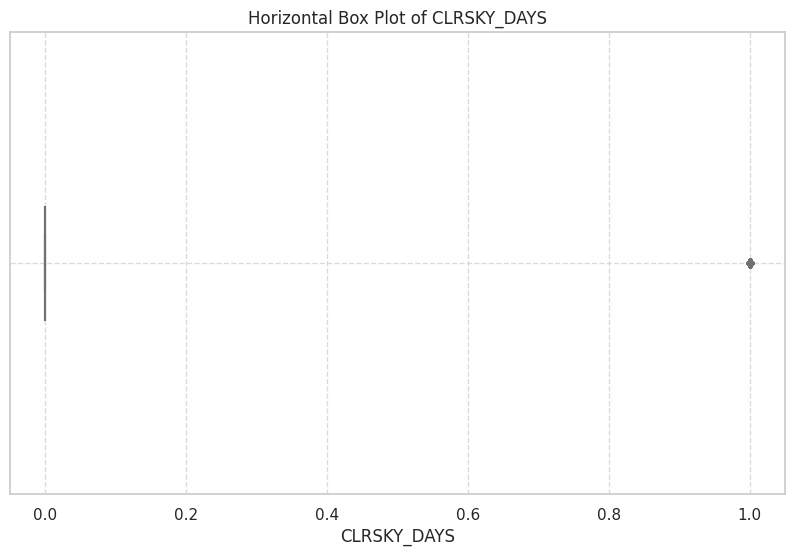

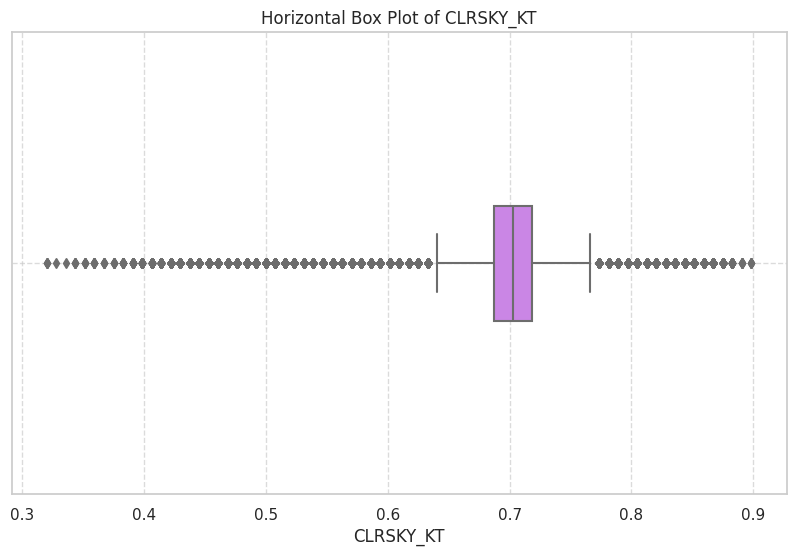

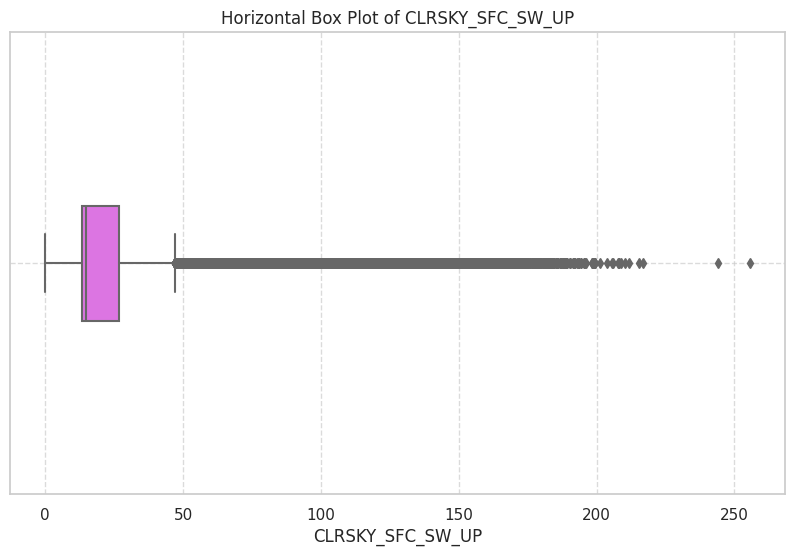

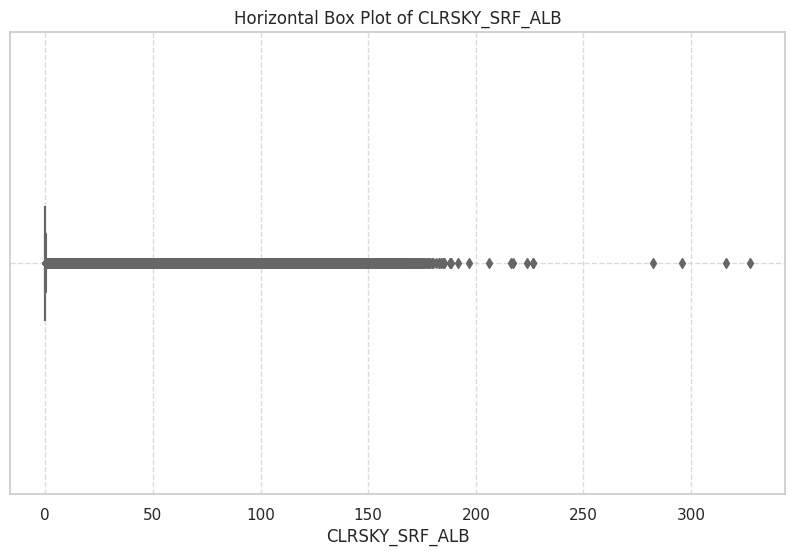

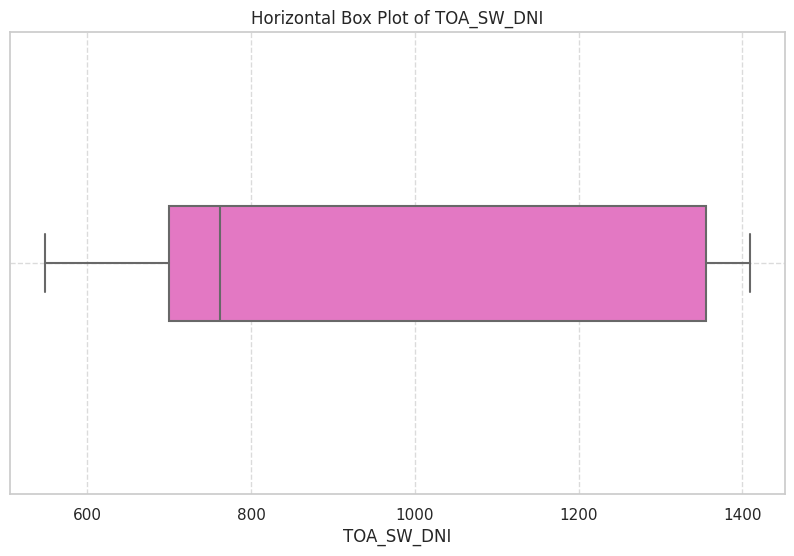

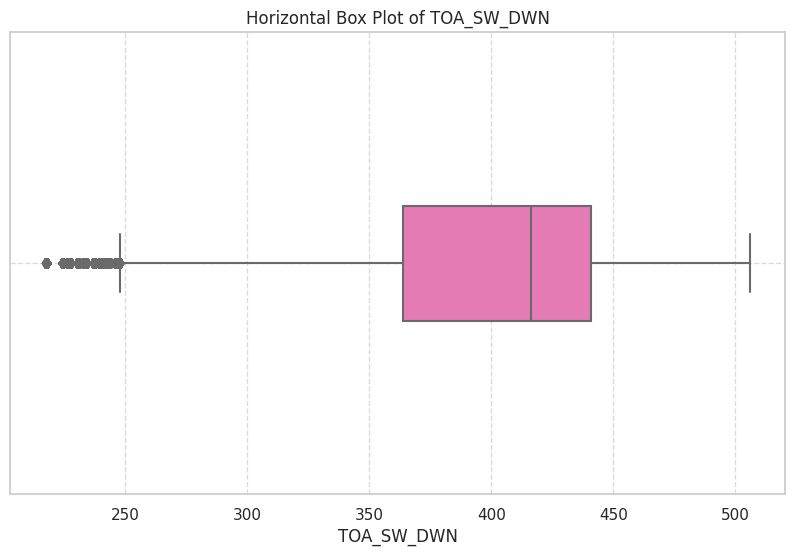

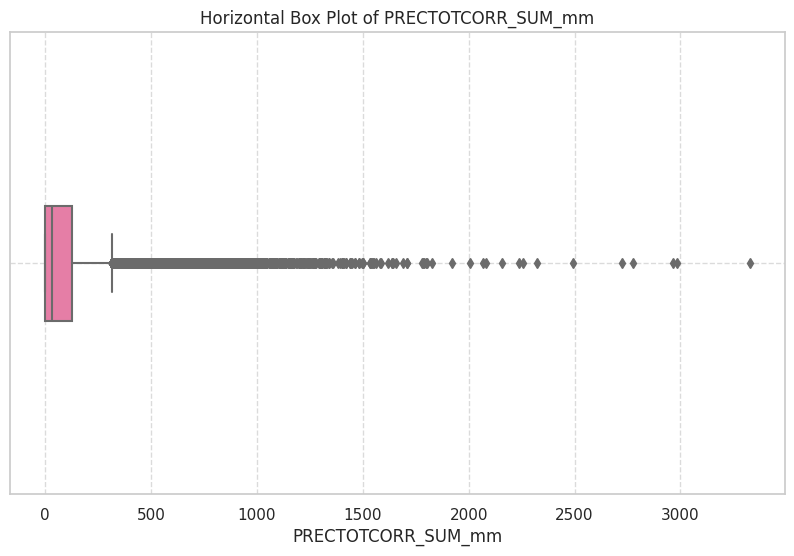

In [4]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplots(polars_df, box_width=0.5):
    """
    Plot horizontal box plots for each variable in the Polars DataFrame except 'time', 'lat', and 'lon',
    with an adjustable width for the boxes.

    Parameters:
    - polars_df (pl.DataFrame): The input Polars DataFrame containing the data to be plotted.
    - box_width (float): The width of the box in the box plot. Default is 0.5.

    Returns:
    None, displays the box plots.
    """
    # Set the aesthetic appearance of the plots
    sns.set(style="whitegrid")

    # Get the list of columns to plot, excluding 'time', 'lat', and 'lon'
    columns_to_plot = [col for col in polars_df.columns if col not in ['time', 'lat', 'lon']]

    # Define a color palette
    palette = sns.color_palette("husl", len(columns_to_plot))

    # Loop through each column and create a separate boxplot
    for idx, column in enumerate(columns_to_plot):
        # Selecting the column for visualization
        values = polars_df[column].to_numpy()  # Convert to NumPy array for Matplotlib

        # Creating the horizontal box plot for the current column
        plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
        sns.boxplot(x=values, color=palette[idx], width=box_width)  # Use seaborn for a colored boxplot with adjusted width
        plt.xlabel(f'{column}')  # X-axis Label
        plt.title(f'Horizontal Box Plot of {column}')  # Title of the plot
        plt.grid(True, linestyle='--', alpha=0.7)  # Enable grid for better readability
        plt.show()

# Example usage:
plot_boxplots(polars_df, box_width=0.25)


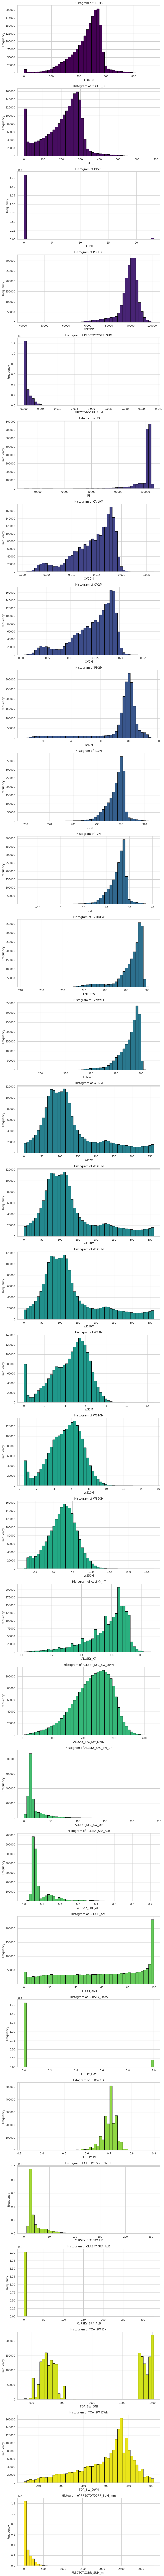

In [5]:
import polars as pl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def plot_histograms(dataframe: pl.DataFrame, exclude_columns: list = ['time', 'lat', 'lon'], n_bins: int = 50):
    """
    Plot histograms for each column in the DataFrame except the specified columns.

    Parameters:
    - dataframe (pl.DataFrame): The Polars DataFrame containing the data.
    - exclude_columns (list): A list of column names to exclude from histogram plotting.
    - n_bins (int): Number of bins for each histogram.

    This function plots each selected column's histogram in a different color.
    """
    # Selecting the columns that are not in the exclude list
    hist_columns = [col for col in dataframe.columns if col not in exclude_columns]

    # Creating a figure with subplots; adjust the figure size and layout as necessary
    fig, axs = plt.subplots(len(hist_columns), 1, figsize=(10, 5 * len(hist_columns)), tight_layout=True)

    # If there's only one column to plot, axs may not be an array, handle single histogram case
    if len(hist_columns) == 1:
        axs = [axs]

    # Create a colormap
    colors = cm.viridis(np.linspace(0, 1, len(hist_columns)))

    # Plotting histogram for each selected column
    for ax, col, color in zip(axs, hist_columns, colors):
        # Extract the data for the column
        data = dataframe[col].to_numpy()  # Convert to numpy array for compatibility with matplotlib
        
        # Plot the histogram
        ax.hist(data, bins=n_bins, color=color, edgecolor='black')
        
        # Setting the title for each subplot
        ax.set_title(f'Histogram of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

    # Display the plots
    plt.show()

# Example of usage:
plot_histograms(polars_df) 
